In [69]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

# 5.1

I'm guessing you want 40*4 models, otherwise the exercise text doesn't make sense to me.
please make the exercise texts clearer in regards to what the exercise is, I've spent way too much time trying to figure what you wanted us to do with the samples and models.

(4, 40, 51) predictions
(4, 51) avg_predictions
(4, 51) variance


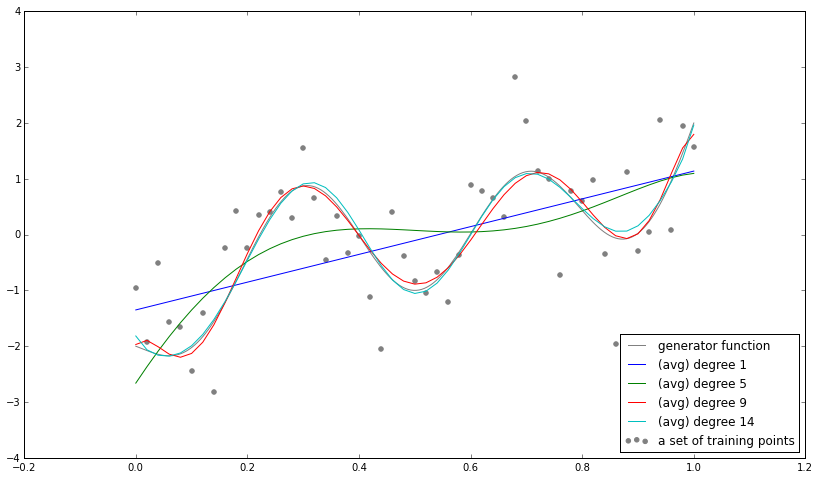

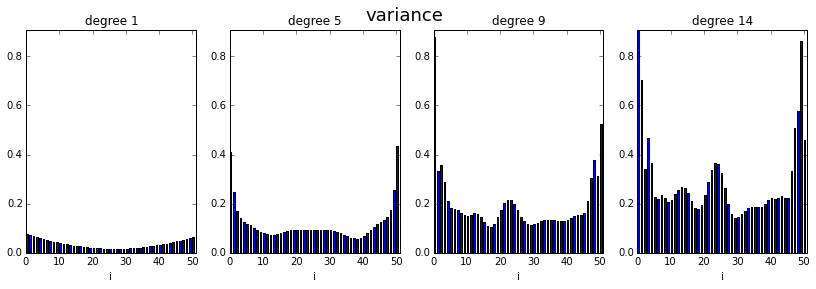

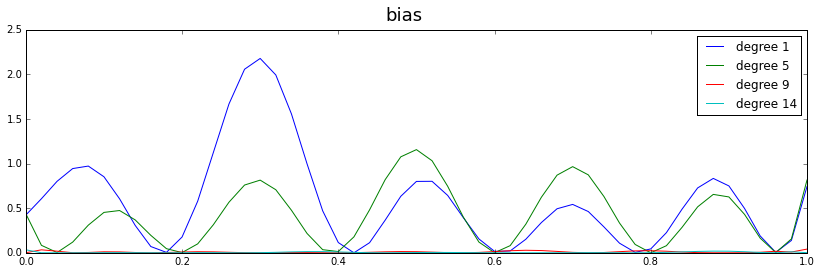

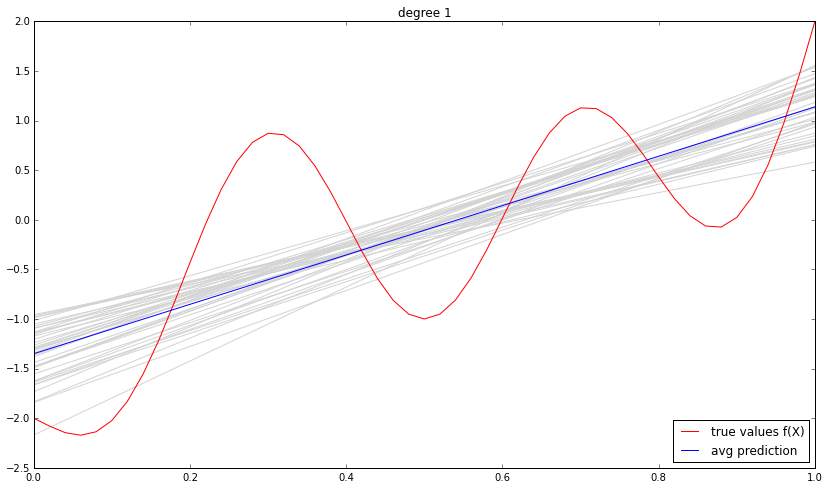

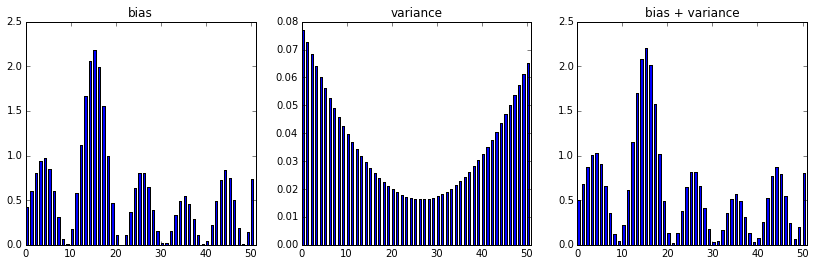

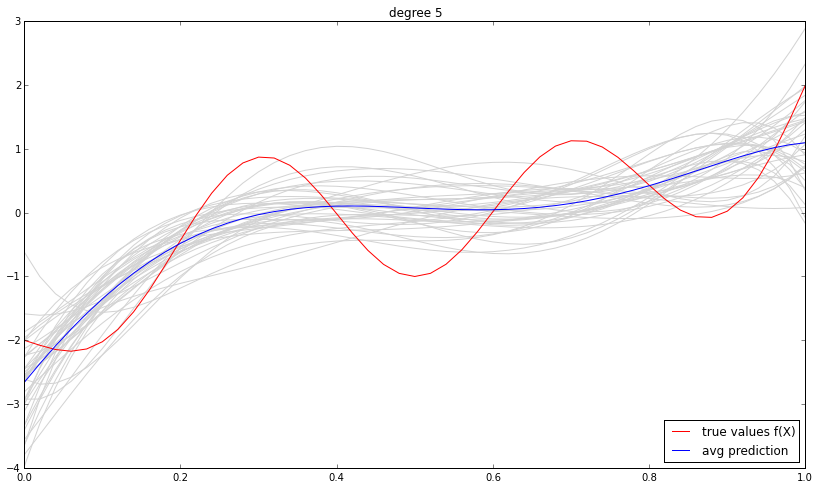

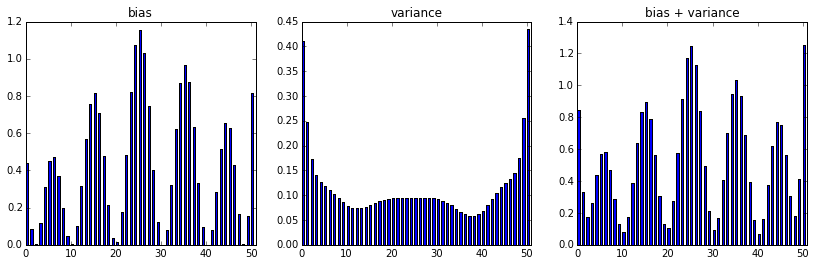

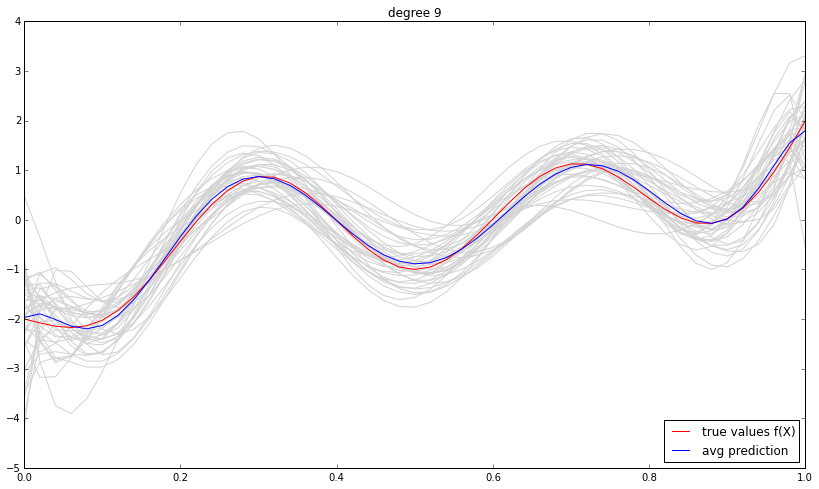

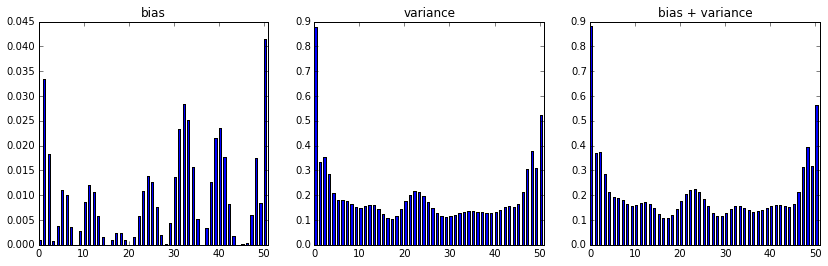

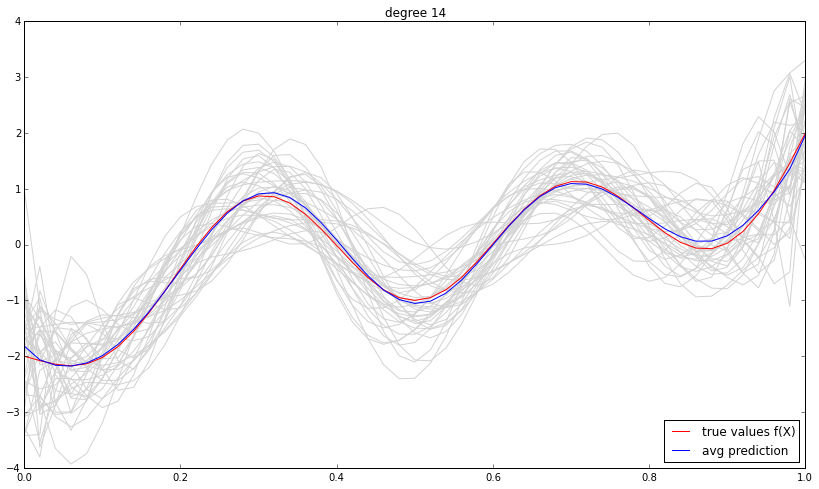

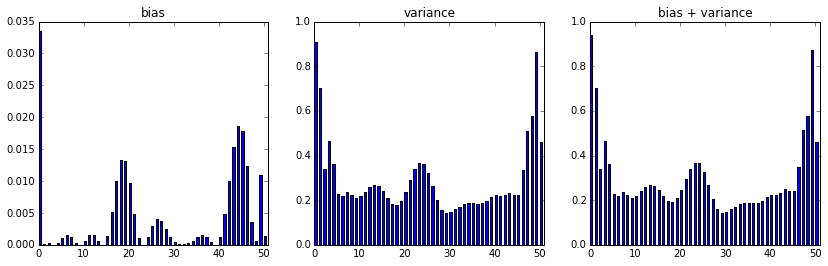

In [215]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline

def f(X): return -np.sin(5. * np.pi * X) + 2.*(2.*X - 1.)**3
# def f(X): return 3 - 2*X + X**2 - X**3

def ex51():
    degrees = [1, 5, 9, 14]
    X = np.linspace(0, 1, 51)
    Xplot = np.linspace(0, 1, 200)[:, np.newaxis]
    Xtrain = X[:, np.newaxis]
    # clone f(X) 40 times
    # randomize by adding 51*40 epsilons drawn from normal distribution with mu=0, sigma=1
    samples = np.tile(f(X), (40, 1)).T + np.random.normal(0, 1, 51*40).reshape((51, 40))
    
    pp.figure(figsize=(14, 8))
    pp.scatter(X, samples[:, 0], label="a set of training points", color="grey")
    pp.plot(Xplot, f(Xplot), label="generator function", color="grey")
    
    predictions = [] # predicted Y's for each of the models
    models = []
    for degree in degrees:
        Ys = []
        ms = []

        # I'm guessing you want 40*4 models, otherwise the exercise text doesn't make sense to me
        # please make the exercise texts clearer in regards to what the exercise is, 
        # I've spent way too much time trying to figure what you wanted us to do with the samples
        # and models
        for i in range(40):
            model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                              ('linear', LinearRegression(fit_intercept=False))])

            Y = samples[:, i]
            model.fit(Xtrain, Y)
            
            ms.append(model)
            Ys.append(model.predict(Xtrain))
            
        predictions.append(Ys)
        models.append(ms)
            
    predictions = np.array(predictions)
    print predictions.shape, "predictions"
    
    # compute average
    avg_predictions = predictions.mean(1)
    print avg_predictions.shape, "avg_predictions"
    
    # print model.named_steps['linear'].coef_, "coefficients"
    for i in range(4):
        pp.plot(Xtrain, avg_predictions[i,:], label="(avg) degree %d" % degrees[i])
    
    pp.legend(loc="lower right")
    
    # compute variance
    variance = predictions.var(1)
    print variance.shape, "variance"
    
    pp.figure(figsize=(14,4))
    pp.suptitle("variance", fontsize=18)
    for i in range(4):
        pp.subplot(1,4,i+1)
        pp.xlim(0, 51)
        pp.ylim(0, np.max(variance))
        pp.bar(np.arange(51), variance[i,:], 0.5)
        pp.title("degree %d" % degrees[i])
        pp.xlabel("i")
    
    # compute bias
    pp.figure(figsize=(14,4))
    pp.suptitle("bias", fontsize=18)
    for i in range(4):
        bias = (avg_predictions[i, :] - f(X))**2
        pp.plot(X, bias, label="degree %d" % degrees[i])
    pp.legend(loc="upper right")
    
    
    # (c) another visualization    
    for i in range(4):
        # all predictions + original fct + avg prediction
        pp.figure(figsize=(14,8))
        for j in range(40):
            pp.plot(Xtrain, predictions[i,j,:], color="lightgrey")
        pp.plot(Xtrain, f(Xtrain), color="red", label="true values f(X)")
        pp.plot(Xtrain, avg_predictions[i,:], color="blue", label="avg prediction")
        pp.title("degree %d" % degrees[i])
        pp.legend(loc="lower right")
        
        pp.figure(figsize=(14,4))
        # bias
        pp.subplot(1,3,1)
        pp.title("bias")
        bias = (avg_predictions[i, :] - f(X))**2
        pp.xlim(0, 51)
        pp.bar(range(51), bias, 0.5)
        # variance
        pp.subplot(1,3,2)
        pp.title("variance")
        pp.xlim(0, 51)
        pp.bar(range(51), variance[i,:], 0.5)
        # bias + variance
        pp.subplot(1,3,3)
        pp.title("bias + variance")
        pp.xlim(0, 51)
        pp.bar(range(51), variance[i,:]+bias, 0.5)
        
    
ex51()